In [25]:
import pandas as pd
pd.set_option('display.max_columns', 55)
import random
import numpy as np

from pathlib import Path

%matplotlib inline

import plotly.express as px
import plotly.figure_factory as ff
pd.set_option('display.max_columns', 127)
pd.set_option('display.max_rows', 127)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [38]:
X_train =  pd.read_csv(r'X_train_BalancedScaled.csv')
X_test =  pd.read_csv(r'X_test_BalancedScaled.csv')

In [39]:
X_train.shape

(235780, 27)

In [40]:
X_test.shape

(58944, 27)

In [41]:
X_train.isna().sum().sum()

0

In [42]:
X_test.isna().sum().sum()

0

In [43]:
y_train = X_train['OVERALL_RESULT']
X_train = X_train.drop('OVERALL_RESULT', axis='columns')

In [44]:
y_test = X_test['OVERALL_RESULT']
X_test = X_test.drop('OVERALL_RESULT', axis='columns')

In [45]:
from sklearn.metrics import plot_confusion_matrix
# define a random forest classifier function
def test_model(X_train,X_test,y_train,y_test):
    rf3 = RandomForestClassifier(n_jobs=-1, n_estimators=500, oob_score=True, max_depth=6, random_state=42)
    rf3.fit(X_train,y_train)
    y_pred = rf3.predict(X_test)
    print('Train data accuracy:' + str(rf3.score(X_train, y_train)))
    print('Test data accuracy:' + str(rf3.score(X_test, y_test)))
    print('Precision: ' + str(precision_score(y_test, y_pred)))
    print('Recall: ' + str(recall_score(y_test, y_pred)))
    print('F1_score: ' + str(f1_score(y_test, y_pred)))
    print('\n')
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(rf3, X_test, y_test)

Train data accuracy:0.5490499618288235
Test data accuracy:0.5014929424538545
Precision: 0.583969465648855
Recall: 0.010382736156351791
F1_score: 0.020402720362715027


              precision    recall  f1-score   support

         0.0       0.50      0.99      0.67     29472
         1.0       0.58      0.01      0.02     29472

    accuracy                           0.50     58944
   macro avg       0.54      0.50      0.34     58944
weighted avg       0.54      0.50      0.34     58944



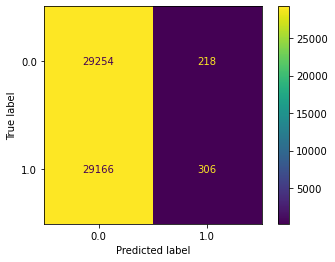

In [46]:
test_model(X_train,X_test,y_train,y_test)